In [21]:
from ultralytics import YOLO
import os
import numpy as np
import pandas as pd

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_path = "/home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3/0AD882F5-967E-43C3-9931-D368483CD8CA_JPG_jpg.rf.37b6761242a2610416303cf88667614a.jpg"
model_path = f"{project_dir}/models/1.pe_weights/best.pt"

In [22]:
pe_model = YOLO(model_path)

In [23]:
result = pe_model(image_path, conf=0.3, verbose=False)[0]

In [24]:
conf = result.keypoints.conf.numpy()[0].reshape(-1,1).T

In [25]:
data_xy=result.keypoints.xy.numpy()[0].T

In [26]:
data_xyn=result.keypoints.xyn.numpy()[0].T

In [27]:
print(f"Keypoints are represented by a vector of type {type(data_xy)} with shape {data_xy.shape}.")
print(f"Each keypoint has a confidence represented by a vector of type {type(conf)} with shape {conf.shape}.")

Keypoints are represented by a vector of type <class 'numpy.ndarray'> with shape (2, 17).
Each keypoint has a confidence represented by a vector of type <class 'numpy.ndarray'> with shape (1, 17).


In [28]:
merged = np.vstack((data_xyn, conf))
merged.shape

(3, 17)

In [29]:
keypoint_names = [
    "nose_pose_detection", "left_eye_pose_detection", "right_eye_pose_detection", "left_ear", "right_ear",
    "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
    "left_wrist", "right_wrist", "left_hip", "right_hip",
    "left_knee", "right_knee", "left_ankle", "right_ankle"
]
keypoints = pd.DataFrame(merged, index=["x", "y","conf"], columns=keypoint_names)

In [30]:
kpt = {}
for col in keypoints.columns:
    if keypoints.loc["conf", col] < 0.1:
        kpt[col] = (-1, -1)
    else:
        x = float(keypoints.loc["x", col])
        y=float(keypoints.loc["y", col])
        kpt[col] = (x, y)

In [31]:
kpt

{'nose_pose_detection': (0.569766640663147, 0.33925288915634155),
 'left_eye_pose_detection': (0.5880284905433655, 0.32815518975257874),
 'right_eye_pose_detection': (0.5501355528831482, 0.32964688539505005),
 'left_ear': (0.6090733408927917, 0.3485449552536011),
 'right_ear': (0.5095840692520142, 0.35182666778564453),
 'left_shoulder': (0.5953840017318726, 0.38885775208473206),
 'right_shoulder': (0.4964582324028015, 0.41089287400245667),
 'left_elbow': (0.6357427835464478, 0.43538951873779297),
 'right_elbow': (0.4498259127140045, 0.46068453788757324),
 'left_wrist': (0.6764496564865112, 0.4748381972312927),
 'right_wrist': (0.4552538990974426, 0.47018274664878845),
 'left_hip': (0.6123744249343872, 0.4942917227745056),
 'right_hip': (0.5176500678062439, 0.5301797986030579),
 'left_knee': (0.6698716878890991, 0.513903021812439),
 'right_knee': (0.5585646629333496, 0.5610153079032898),
 'left_ankle': (0.7078207731246948, 0.5829747915267944),
 'right_ankle': (0.6460036039352417, 0.5973

<class 'numpy.ndarray'>


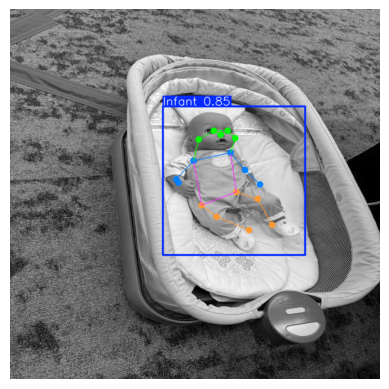

In [34]:
# Disegna keypoints sull'immagine
import cv2

img_with_keypoints = result[0].plot()
print(type(img_with_keypoints))

import cv2
import matplotlib.pyplot as plt

# img_with_keypoints è già un array NumPy (BGR)
img_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [35]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("frame.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


[ WARN:0@2787.400] global loadsave.cpp:275 findDecoder imread_('frame.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
